# Titre principal 

In [6]:
x = 10
y = 20
z = x/y
print(f"Valeur de Z: {z}")

Valeur de Z: 0.5


In [8]:
x=[1,2,3,4,5,6,7,8,9,10]
for i in x:
    if i < 5:
        print(f"i : {i} smaller than 5")
    elif i == 5:
        print(f"i : {i} equal to 5")
    else:
        print(f"i : {i} superior than 5")

i : 1 smaller than 5
i : 2 smaller than 5
i : 3 smaller than 5
i : 4 smaller than 5
i : 5 equal to 5
i : 6 superior than 5
i : 7 superior than 5
i : 8 superior than 5
i : 9 superior than 5
i : 10 superior than 5


In [21]:
x = 5
for i in range(1, 1):
    x = x * x
print(x)

5


In [19]:
def _square(x, n):
    m = x
    j = 0
    for i in range(1, n):
        j = j+1
        x = x * m
    return x, j
_square(5,2)

(25, 1)

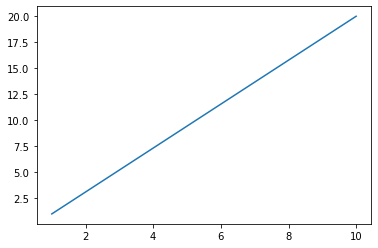

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1,10,10)
y = np.linspace(1,20,10)

plt.plot(x,y)

In [14]:
def puissance2(x,n):
    R=1
    X=x
    N=n
    j=0
    while (N>0):
        if ((N%2)!=0):
            R=R*X
        N=N//2
        X=X*X
        j = j+4
        #j = complexité
    return R, j

puissance2(5,2)

(25, 8)

In [25]:
absisse = []
y1 = []
y2 = []

for i in range(50):
    absisse.append(i)
    y1.append(_square(5, i)[1])
    y2.append(puissance2(5, i)[1])

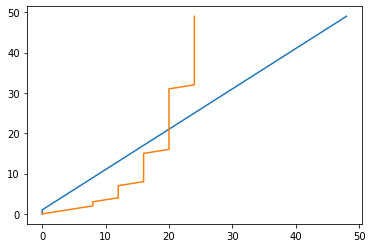

In [32]:
import matplotlib.pyplot as plt

plt.plot(y1, absisse)
plt.plot(y2, absisse)

In [1]:
from pymongo import MongoClient
import pprint

client = MongoClient('localhost', 27017)
db = client['DataProject']
collection_trafic = db['vehicules']

In [3]:
print(collection_trafic.find().count())

600000


<ipython-input-3-38fae6abf435>:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  print(collection_trafic.find().count())


In [4]:
pprint.pprint(list(collection_trafic.find()[0:5]))

[{'_id': ObjectId('60b5f7999b3e3d9b07c4e057'),
  'nb_vehicules': 32,
  'num_arete': 0,
  'num_jour': 0,
  'num_periode': 0,
  'plage_horaire': 'm'},
 {'_id': ObjectId('60b5f7999b3e3d9b07c4e058'),
  'nb_vehicules': 58,
  'num_arete': 0,
  'num_jour': 0,
  'num_periode': 1,
  'plage_horaire': 'm'},
 {'_id': ObjectId('60b5f7999b3e3d9b07c4e059'),
  'nb_vehicules': 41,
  'num_arete': 0,
  'num_jour': 0,
  'num_periode': 2,
  'plage_horaire': 'm'},
 {'_id': ObjectId('60b5f7999b3e3d9b07c4e05a'),
  'nb_vehicules': 27,
  'num_arete': 0,
  'num_jour': 0,
  'num_periode': 3,
  'plage_horaire': 'm'},
 {'_id': ObjectId('60b5f7999b3e3d9b07c4e05b'),
  'nb_vehicules': 15,
  'num_arete': 0,
  'num_jour': 0,
  'num_periode': 4,
  'plage_horaire': 'm'}]


In [5]:
collection_trafic.insert_one({"num_arete":501})
print(collection_trafic.find_one({"num_arete":501}))

{'_id': ObjectId('60b8ddebd9fd01a51b8ff3d4'), 'num_arete': 501}


In [6]:
collection_trafic.delete_one({"num_arete":501})
print(collection_trafic.find_one({"num_arete":501}))

None


In [7]:
vehicules_par_plage = {"m":0, "s":0}
for trafic in collection_trafic.find({"$or":[{"plage_horaire":"m"}, {"plage_horaire":"s"}]}):
    plage = trafic["plage_horaire"]
    vehicules_par_plage[plage] += trafic["nb_vehicules"]
print(vehicules_par_plage)

{'m': 19720247, 's': 28191853}


In [29]:
test = collection_trafic.aggregate([{"$group": {"_id" : "$plage_horaire", "nbr_vehicules":{"$sum":"$nb_vehicules"}}}])
print(list(test))

[{'_id': 'm', 'nbr_vehicules': 19720247}, {'_id': 's', 'nbr_vehicules': 28191853}]


In [10]:
#Convertion des données
import datetime 
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
db = client['DataProject']
collection_trafic = db['vehicules']

data = list(collection_trafic.find())

def data_convert(item):
    new_item = {}
    jour = item["num_jour"] + 1 #Jour
    minute = 0
    heure = 7 if item["plage_horaire"] == "m" else 17
    if item["num_periode"] < 59:
        minute = item["num_periode"] + 1
    else:
        heure += (item["num_periode"] + 1) // 60 #Floor division
        minute = (item["num_periode"] + 1) % 60
    date = str(datetime.datetime(2020, 1, jour, heure, minute)) #DateTime Object
    new_item["num_arete"] = item["num_arete"]
    new_item["date"] = date
    new_item["nb_vehicules"] = item["nb_vehicules"]
    return new_item

#Loop through each line and convert
new_data = []
for item in data:
    new_data.append(data_convert(item))

#new collection
new_collection_traffic = db['véhicules_stamped']
new_collection_traffic.insert_many(new_data)
print(collection_trafic.find()[200])
print(new_collection_traffic.find()[200])

{'_id': ObjectId('60b5f7999b3e3d9b07c4e11f'), 'num_arete': 0, 'num_jour': 0, 'plage_horaire': 's', 'num_periode': 87, 'nb_vehicules': 61}
{'_id': ObjectId('60ba01dad66888800ae20cf1'), 'num_arete': 0, 'date': '2020-01-01 18:28:00', 'nb_vehicules': 61}


In [12]:
new_collection_traffic.find().count()

<ipython-input-12-f800e3603d28>:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  new_collection_traffic.find().count()


600000

In [20]:
import pprint
pprint.pprint(list(new_collection_traffic.find()[0:10]))

[{'_id': ObjectId('60ba01dad66888800ae20c29'),
  'date': '2020-01-01 07:01:00',
  'nb_vehicules': 32,
  'num_arete': 0},
 {'_id': ObjectId('60ba01dad66888800ae20c2a'),
  'date': '2020-01-01 07:02:00',
  'nb_vehicules': 58,
  'num_arete': 0},
 {'_id': ObjectId('60ba01dad66888800ae20c2b'),
  'date': '2020-01-01 07:03:00',
  'nb_vehicules': 41,
  'num_arete': 0},
 {'_id': ObjectId('60ba01dad66888800ae20c2c'),
  'date': '2020-01-01 07:04:00',
  'nb_vehicules': 27,
  'num_arete': 0},
 {'_id': ObjectId('60ba01dad66888800ae20c2d'),
  'date': '2020-01-01 07:05:00',
  'nb_vehicules': 15,
  'num_arete': 0},
 {'_id': ObjectId('60ba01dad66888800ae20c2e'),
  'date': '2020-01-01 07:06:00',
  'nb_vehicules': 51,
  'num_arete': 0},
 {'_id': ObjectId('60ba01dad66888800ae20c2f'),
  'date': '2020-01-01 07:07:00',
  'nb_vehicules': 42,
  'num_arete': 0},
 {'_id': ObjectId('60ba01dad66888800ae20c30'),
  'date': '2020-01-01 07:08:00',
  'nb_vehicules': 43,
  'num_arete': 0},
 {'_id': ObjectId('60ba01dad6688

In [ ]:
#Validation des données
import datetime 
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
db = client['DataProject']
new_collection_traffic = db['véhicules_stamped']


